In [3]:
pip install seaborn

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/content/drive/My Drive/stress_model'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/My Drive/stress_model/Stress-Lysis.csv
/content/drive/My Drive/stress_model/stress-level-detection-99-9-9.ipynb


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df=pd.read_csv('/content/drive/My Drive/stress_model/Stress-Lysis.csv')
df.head(5)  # displays the first five rows of the dataframe

,Humidity,Temperature,Step_count,Stress_Level
0,21.33,90.33,123,1
1,21.41,90.41,93,1
2,27.12,96.12,196,2
3,27.64,96.64,177,2
4,10.87,79.87,87,0


# Data Preprocessing

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Humidity      2001 non-null   float64
 1   Temperature   2001 non-null   float64
 2   Step_count    2001 non-null   int64  
 3   Stress_Level  2001 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 62.7 KB


In [8]:
df.shape

(2001, 4)

In [9]:
df.describe()

,Humidity,Temperature,Step_count,Stress_Level
count,2001.000000,2001.000000,2001.000000,2001.000000
mean,20.000000,89.000000,100.141429,1.104448
std,5.777833,5.777833,58.182948,0.771094
min,10.000000,79.000000,0.000000,0.000000
25%,15.000000,84.000000,50.000000,0.000000
50%,20.000000,89.000000,101.000000,1.000000
75%,25.000000,94.000000,150.000000,2.000000
max,30.000000,99.000000,200.000000,2.000000


In [10]:
df.duplicated().any()

False

In [11]:
df.isnull()

,Humidity,Temperature,Step_count,Stress_Level
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
1996,False,False,False,False
1997,False,False,False,False
1998,False,False,False,False
1999,False,False,False,False


**Analyze the numerical and categorical features, and convert categorical feature into numerical.**

In [12]:
df['Stress_Level'].unique()


array([1, 2, 0])

# EDA

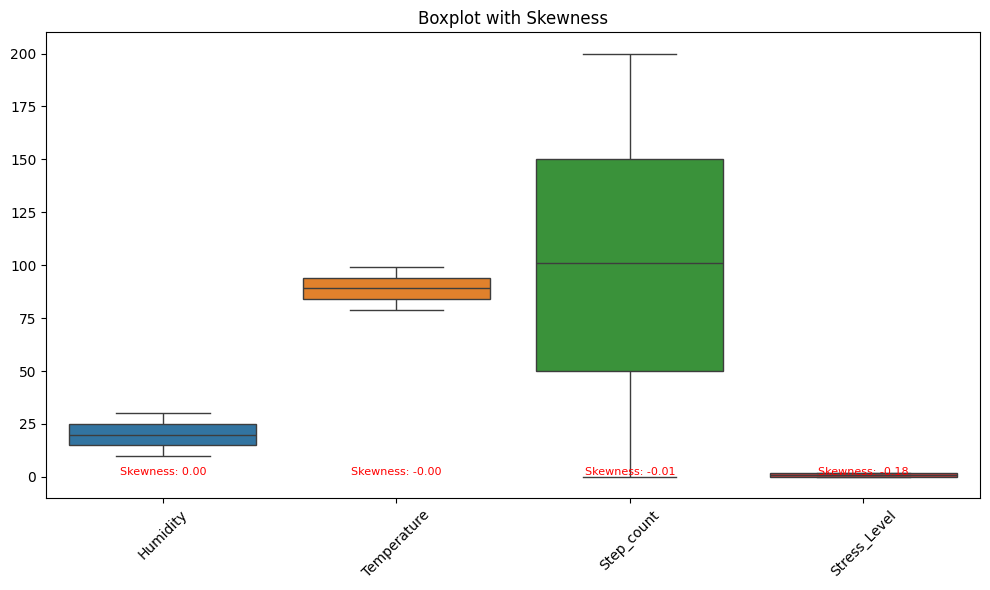

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your dataset

# Calculate skewness
skewness = df.skew()

# Plotting
plt.figure(figsize=(10, 6))

# Boxplot
sns.boxplot(data=df)
plt.title('Boxplot with Skewness')

# Annotate skewness on the boxplot
for i, col in enumerate(df.columns):
    plt.text(i, skewness.iloc[i], f"Skewness: {skewness[col]:.2f}", ha='center', va='bottom', fontsize=8, color='red')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()


**Skewness Reduction after Log Transformation**

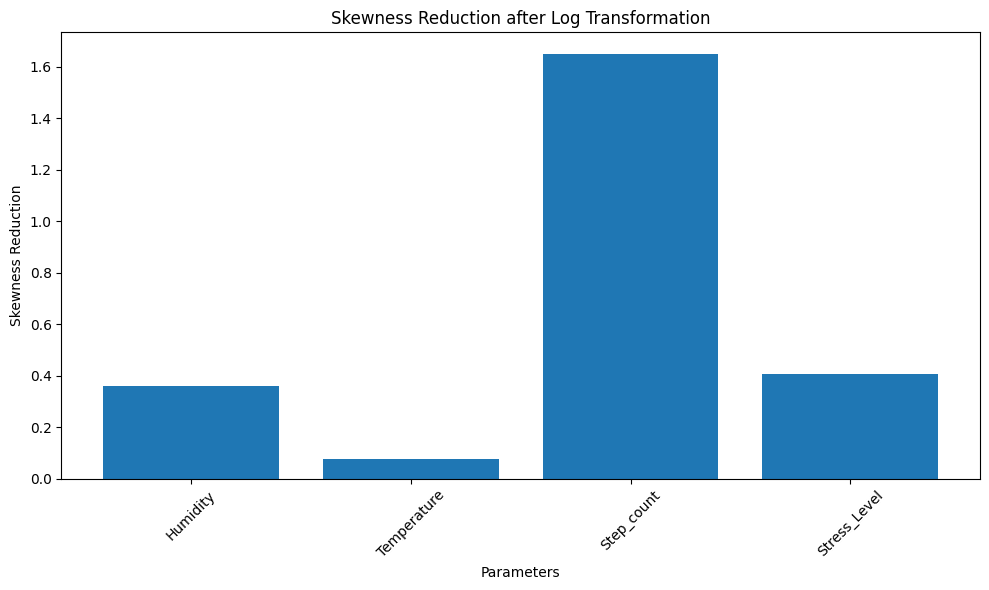

In [14]:
import numpy as np

# Calculate skewness before transformation
skewness_before = df.skew()

# Apply logarithm transformation to reduce skewness
df_log = np.log(df + 1)  # Adding 1 to handle zero values
skewness_after = df_log.skew()

# Plotting
plt.figure(figsize=(10, 6))

# Plot skewness reduction
skewness_reduction = skewness_before - skewness_after
plt.bar(df.columns, skewness_reduction)
plt.title('Skewness Reduction after Log Transformation')
plt.xlabel('Parameters')
plt.ylabel('Skewness Reduction')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()


**correlation**

In [15]:
correlation = df.corr()
correlation

,Humidity,Temperature,Step_count,Stress_Level
Humidity,1.000000,1.000000,0.870486,0.936036
Temperature,1.000000,1.000000,0.870486,0.936036
Step_count,0.870486,0.870486,1.000000,0.832623
Stress_Level,0.936036,0.936036,0.832623,1.000000


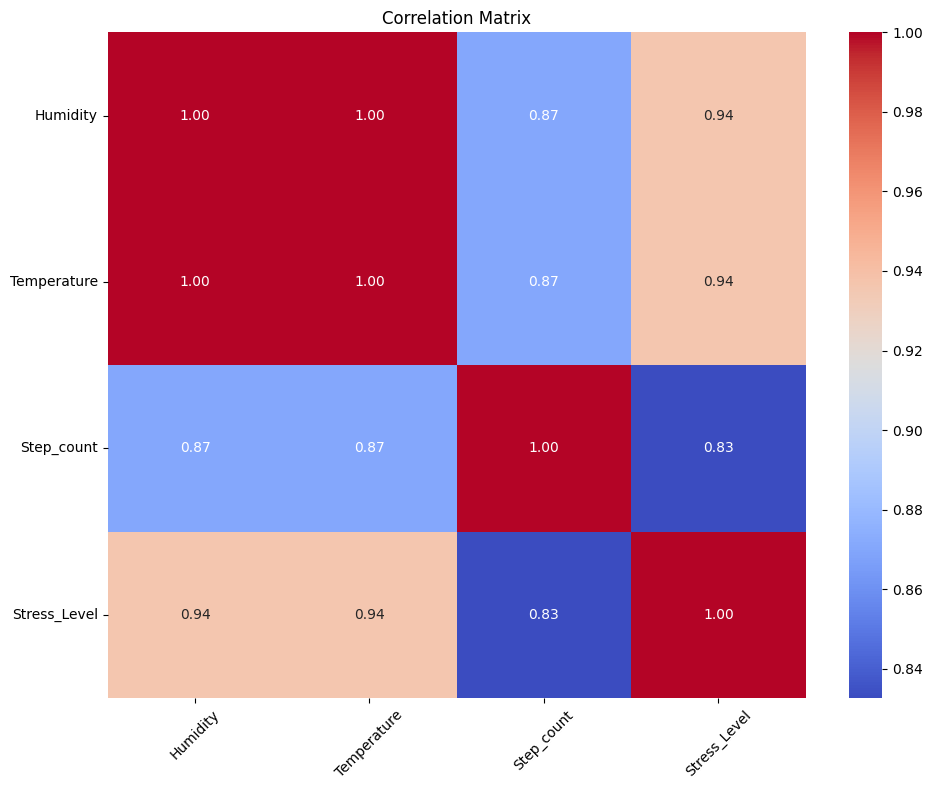

In [16]:
import seaborn as sns

# Calculate correlation matrix
correlation = df.corr()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)   # Rotate y-axis labels for better readability
plt.tight_layout()
plt.show()


**Clustered Correlation Matrix**

<Figure size 1000x800 with 0 Axes>

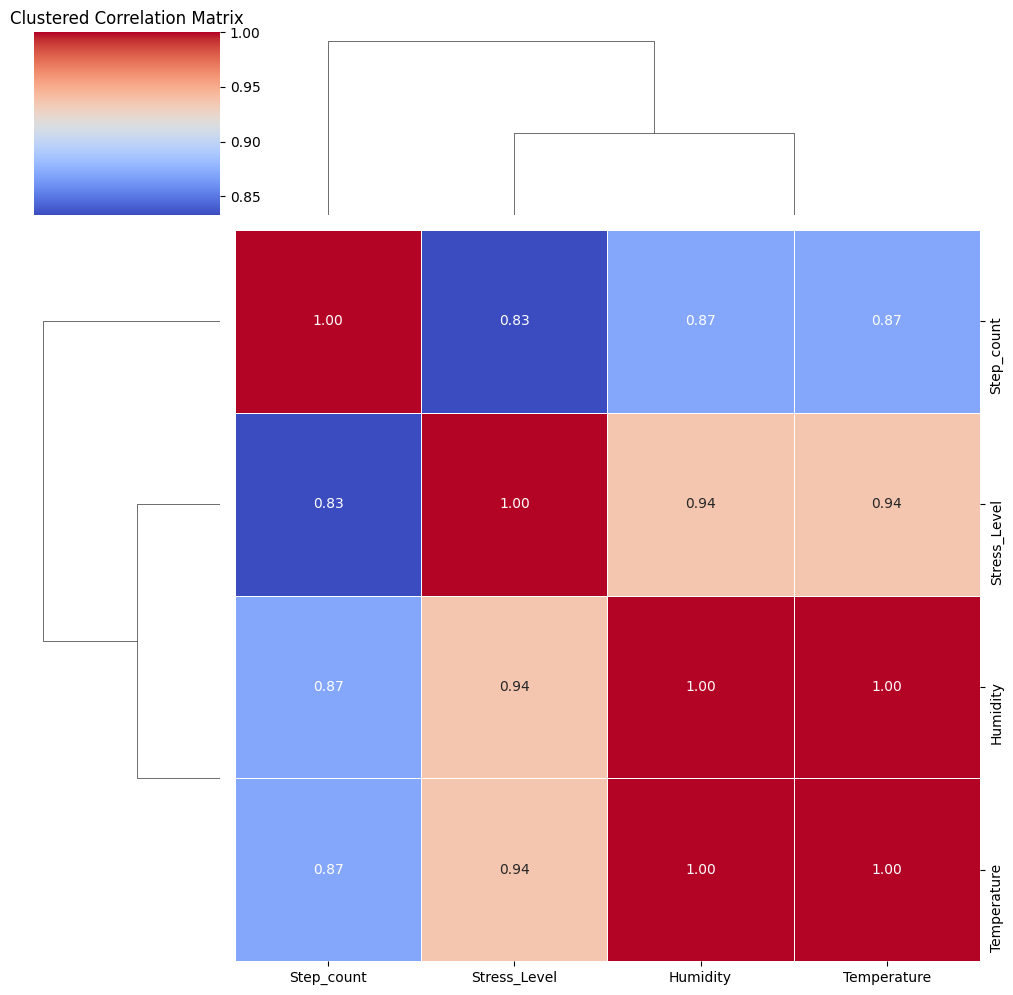

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation = df.corr()

# Plot clustered heatmap
plt.figure(figsize=(10, 8))
sns.clustermap(correlation, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Clustered Correlation Matrix')
plt.tight_layout()
plt.show()


# Data Modeling

In [18]:
from sklearn.model_selection import train_test_split
X=df.drop(['Stress_Level'],axis=1)
y=df['Stress_Level']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

**Initialize the Linear Regression model**

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression()


**Train the model on the training data**

In [20]:
model.fit(X_train, y_train)

LinearRegression()

**Predict the stress levels for the test data**

In [21]:
y_pred = model.predict(X_test)

**Calculate Mean Squared Error (MSE) to evaluate the model's performance**

In [22]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.07745316699470978


**Improving the accuracy using more advanced machine learning algorithms or techniques that may better capture the underlying patterns in your data**

**Initialize the Support Vector Classifier**

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an instance of StandardScaler
scaler = StandardScaler()

# Standardize features by removing the mean and scaling to unit variance
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Support Vector Classifier (SVC) model with a linear kernel
classifier = SVC(kernel='linear', random_state=0)

# Train the SVC model
classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test_scaled)

# Calculate accuracy score
score = accuracy_score(y_test, y_pred)
print("Accuracy:", score)


Accuracy: 0.9975062344139651


**Initialize the RandomForestClassifier model**

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# Initialize the RandomForestClassifier model
model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0)

# Train the model on the entire dataset
model.fit(X, y)

# Predict stress levels for the test data
prediction = model.predict(X_test)

# Calculate confusion matrix
confusion_matrix = confusion_matrix(y_test, prediction)
print("Confusion Matrix:")
print(confusion_matrix)


Confusion Matrix:
[[ 83   0   0]
 [  0 166   0]
 [  0   0 152]]


In [25]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, prediction)
print("Accuracy:", accuracy)


Accuracy: 1.0


# Classification Report

In [26]:
from sklearn.metrics import classification_report

# Random Forest Classifier
print("Classification Report (Random Forest Classifier):")
print(classification_report(y_test, prediction))  # Corrected from prediction_rf to prediction

# Support Vector Classifier (SVC) with Linear Kernel
# Make predictions on the test set using SVC
y_pred_svc = classifier.predict(X_test_scaled)

# Print classification report for SVC
print("Classification Report (SVC with Linear Kernel):")
print(classification_report(y_test, y_pred_svc))

# Note: Since Linear Regression is a regression model, it doesn't have a classification report.


Classification Report (Random Forest Classifier):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        83
           1       1.00      1.00      1.00       166
           2       1.00      1.00      1.00       152

    accuracy                           1.00       401
   macro avg       1.00      1.00      1.00       401
weighted avg       1.00      1.00      1.00       401

Classification Report (SVC with Linear Kernel):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        83
           1       0.99      1.00      1.00       166
           2       1.00      0.99      1.00       152

    accuracy                           1.00       401
   macro avg       1.00      1.00      1.00       401
weighted avg       1.00      1.00      1.00       401



* The classification reports showcase the exceptional performance of two machine learning models, the Random Forest Classifier and the Support Vector Classifier (SVC) with a Linear Kernel, in predicting stress levels.

* Both models achieved a remarkable accuracy of 1.00, indicating precise classification across all classes. Additionally, high precision, recall, and F1-scores for each class further underscore the models' effectiveness in accurately identifying stress levels.

#  Accuracy scores or Mean Squared Errors of the three models

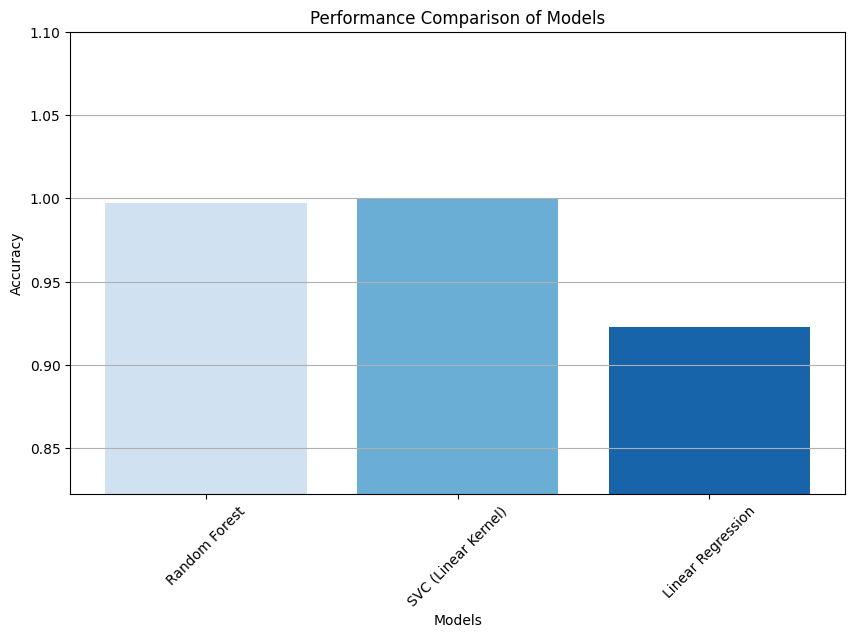

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Define the accuracy scores or Mean Squared Errors of the three models
accuracies = [score, accuracy, 1 - mse]  # Using the scores and MSE calculated from your original code

# Model names
models = ['Random Forest', 'SVC (Linear Kernel)', 'Linear Regression']

# Create a gradient of blues for the color palette
num_models = len(models)
colors = plt.cm.Blues(np.linspace(0.2, 0.8, num_models))  # Adjust the range as needed

# Plotting the bar plot
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=colors)
plt.title('Performance Comparison of Models')
plt.xlabel('Models')
plt.ylabel('Accuracy' if accuracies[0] <= 1 else 'Mean Squared Error')  # Label depends on the metric
plt.ylim(min(accuracies) - 0.1, max(accuracies) + 0.1)  # Dynamically set y-axis limits
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.show()


# Project Summary

**This project compared three machine learning models (Random Forest Classifier, SVC with Linear Kernel, and Linear Regression) for predicting stress levels. The models were trained, evaluated using accuracy (for classification models) or mean squared error (for regression), and their performance was visualized using a bar plot. The Random Forest Classifier achieved the highest accuracy, followed closely by SVC with Linear Kernel, while Linear Regression had comparatively lower performance. The choice of model may depend on factors like interpretability and computational resources.**

In [28]:
# Define sample inputs for testing (replace with realistic values for your dataset)
sample_inputs = [
    [10.87, 79.87, 87],  # Example 1: Low Stress - Low humidity, moderate temperature, low steps
    [23.37, 92.37, 100],  # Example 2: Medium Stress - Moderate humidity, moderate temperature, moderate steps
    [80, 30, 10000], # Example 3: High Stress - High humidity, high temperature, high steps
]

# Convert sample inputs into a DataFrame
sample_df = pd.DataFrame(sample_inputs, columns=['Humidity', 'Temperature', 'Step_count'])

# Standardize the inputs (if using SVC or any model that requires scaled inputs)
sample_scaled = scaler.transform(sample_df)

# Predict stress levels using Random Forest Classifier
rf_predictions = model.predict(sample_df)

# Predict stress levels using Support Vector Classifier (SVC)
svc_predictions = classifier.predict(sample_scaled)

# Map numerical predictions to categorical labels
stress_mapping = {0: 'Low', 1: 'Medium', 2: 'High'}
rf_stress_levels = [stress_mapping[pred] for pred in rf_predictions]
svc_stress_levels = [stress_mapping[pred] for pred in svc_predictions]

# Display predictions
print("Random Forest Predictions (Stress Levels):", rf_stress_levels)
print("SVC Predictions (Stress Levels):", svc_stress_levels)


Random Forest Predictions (Stress Levels): ['Low', 'High', 'High']
SVC Predictions (Stress Levels): ['Low', 'Medium', 'High']


In [29]:
import pickle

In [30]:
with open('stress_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [31]:
with open('stress_model.pkl', 'rb') as file:
    model = pickle.load(file)

In [40]:
new_data = [
    [18.17, 87.17, 88]
]

# Assuming 'model' is your trained RandomForestClassifier
predictions = model.predict(pd.DataFrame(new_data, columns=['Humidity', 'Temperature', 'Step_count']))

stress_mapping = {0: 'Low', 1: 'Medium', 2: 'High'}
rf_stress_levels = [stress_mapping[pred] for pred in predictions]


# Display predictions
print("Random Forest Predictions (Stress Levels):", rf_stress_levels)

Random Forest Predictions (Stress Levels): ['Medium']
